In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow

In [4]:
dftest = pd.read_csv(r"D:\IIT-BHU Engg\CSE-SEM3\CSO-211\Project\DataSet\filtered.csv",sep=',')

In [5]:
print(dftest)
print(dftest.columns.values)
# dftest=dftest.drop('Unnamed: 0',axis=1) 

         Unnamed: 0  Time [s]  Elevation [m]  Throttle [%]  Motor Torque [Nm]  \
0                 0       0.0          574.0           0.0                0.0   
1                 1       0.1          574.0           0.0                0.0   
2                 2       0.2          574.0           0.0                0.0   
3                 3       0.3          574.0           0.0                0.0   
4                 4       0.4          574.0           0.0                0.0   
...             ...       ...            ...           ...                ...   
1044165     1094788    1642.4          476.0           0.0                2.5   
1044166     1094789    1642.5          476.0           0.0                2.5   
1044167     1094790    1642.6          476.0           0.0                2.5   
1044168     1094791    1642.7          476.0           0.0                2.5   
1044169     1094792    1642.8          476.0           0.0                2.5   

         Longitudinal Accel

In [15]:
def set_negative_plot_color():
    plt.figure(figsize=(30, 6), facecolor='black')
    ax = plt.axes()
    ax.set_facecolor("black")
    ax.spines['bottom'].set_color('white')
    ax.spines['top'].set_color('white')
    ax.spines['right'].set_color('white')
    ax.spines['left'].set_color('white')
    ax.tick_params(colors='white', which='both')
    plt.grid(True)
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error, mean_squared_error
def regression_metrics(y_test, y_pred):
    # calculate errors
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    eps = 1e-10 # a small value to avoid division by zero
    rmspe = np.sqrt(np.mean(np.square(((y_test - y_pred) / (y_test + eps)))))
    rmspe = np.sqrt(np.mean(np.square(((y_test - y_pred)/y_test)), axis=0))
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    # report error
    print(f'Mean Squared Error: {mse}')
    print(f'Root Mean Square Error: {rmse}')
    print(f'Root Mean Square Percentage Error: {rmspe}')
    print(f'Mean Absolute Error: {mae}')
    print(f'Mean Absolute Percentage Error: {mape}')


def plot_comparison(y_test, y_pred, xlabel, ylabel, dark_mode=False, figsize=(30, 6)):
    import matplotlib as mpl
    mpl.rcParams['agg.path.chunksize'] = 200
    mpl.rcParams['path.simplify_threshold'] = 0.5
    if dark_mode:
        plt.figure(figsize=figsize, facecolor='black')
        ax = plt.axes()
        ax.set_facecolor("black")
        ax.spines['bottom'].set_color('gray')
        ax.spines['top'].set_color('gray')
        ax.spines['right'].set_color('gray')
        ax.spines['left'].set_color('gray')
        ax.tick_params(colors='white', which='both')
        plt.plot(y_pred, color="yellow")
        plt.plot(y_test, color="white")
        plt.legend(['Predicted', 'Measured'])
        plt.xlabel(xlabel, color='white')
        plt.ylabel(ylabel, color='white')
    else:
        plt.figure(figsize=figsize)
        plt.plot(y_pred)
        plt.plot(y_test)
        plt.legend(['Predicted', 'Measured'])
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
    plt.grid(True)


In [21]:
X=dftest.drop(['SoC [%]'],axis=1)
y= dftest['SoC [%]']

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import  numpy as np
import pandas as pd
# create a linear regression object
lr = LinearRegression()

# create an RFE object to select the top 17 features
rfe = RFE(lr, n_features_to_select=17)

# fit the RFE object to the data
rfe.fit(X, y)

# print the top features selected by the RFE object
top_features = X.columns[rfe.support_].tolist()
print(top_features)


['Elevation [m]', 'Motor Torque [Nm]', 'Longitudinal Acceleration [m/s^2]', 'Regenerative Braking Signal ', 'Battery Voltage [V]', 'Battery Current [A]', 'Battery Temperature [°C]', 'max. Battery Temperature [°C]', 'displayed SoC [%]', 'max. SoC [%)', 'Heating Power CAN [kW]', 'AirCon Power [kW]', 'Heater Signal', 'Ambient Temperature [°C]', 'Requested Coolant Temperature [°C]', 'Heat Exchanger Temperature [°C]', 'Cabin Temperature Sensor [°C]']


In [9]:


def plot_dataframe_subplots(df, nrows, ncols, figsize=(30, 24)):
    """Plot a nrows x ncols grid of the df variables"""
    measurements = list(df.columns)
    plt.figure(figsize=figsize)
    for idx, key in enumerate(measurements):
        plt.subplot(nrows, ncols, idx+1)
        plt.plot(np.array(range(df.shape[0]))*0.1, df[key])
        plt.ylabel(key)
        plt.grid(True)
        plt.xlabel(measurements[0])
        plt.show

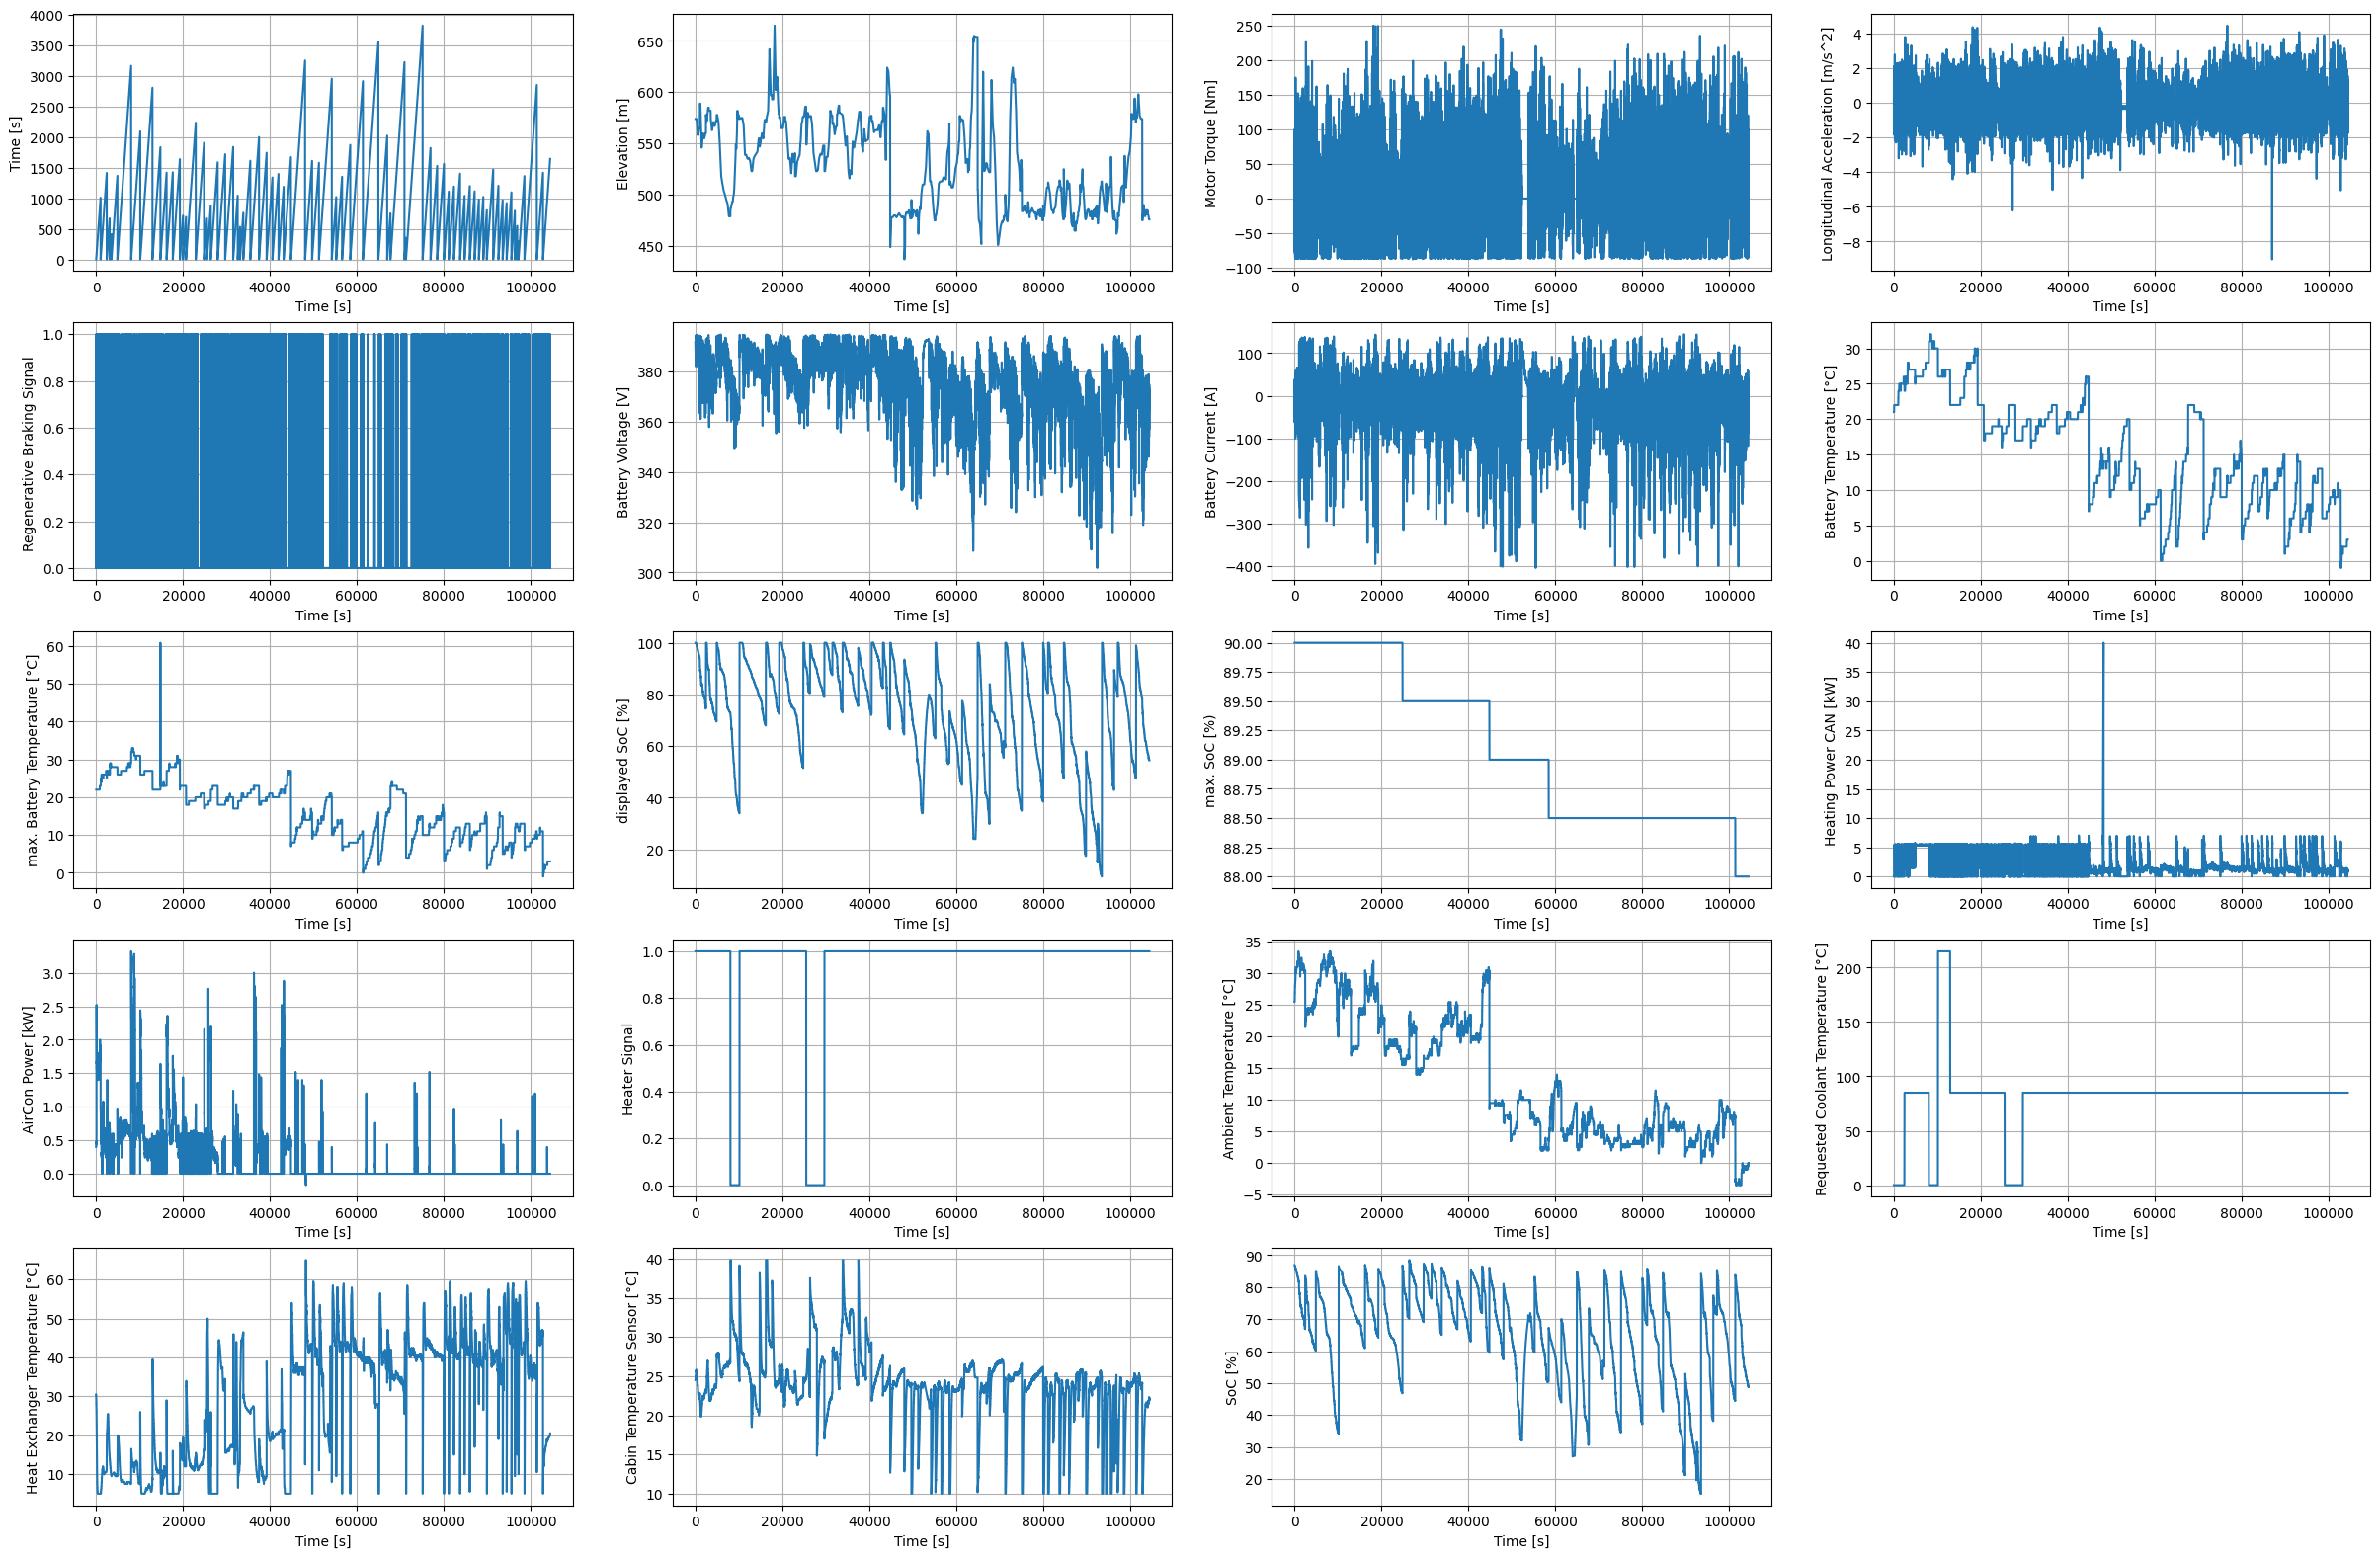

In [10]:

df_x_y = dftest[['Time [s]', 'Elevation [m]', 'Motor Torque [Nm]', 'Longitudinal Acceleration [m/s^2]', 'Regenerative Braking Signal ', 'Battery Voltage [V]', 'Battery Current [A]', 'Battery Temperature [°C]', 'max. Battery Temperature [°C]', 'displayed SoC [%]', 'max. SoC [%)', 'Heating Power CAN [kW]', 'AirCon Power [kW]', 'Heater Signal', 'Ambient Temperature [°C]','Requested Coolant Temperature [°C]', 'Heat Exchanger Temperature [°C]', 'Cabin Temperature Sensor [°C]','SoC [%]']].dropna()

plot_dataframe_subplots(df_x_y, nrows=12, ncols=4, figsize=(30, 48))
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
print(df_x_y)
X = df_x_y.drop(['Time [s]','SoC [%]'], axis=1)
y = df_x_y[['SoC [%]']]  # Close the square bracket
# Split the data into train and test sets with a ratio of 95:5
splitter = int(len(X) * 0.95)
X_train, X_test = X.values[:splitter], X.values[splitter:]
y_train, y_test = y.values[:splitter], y.values[splitter:]

# Split the train set into train and validation sets with a ratio of 90:10
splitter1 = int(len(X_train) * 0.9)
X_train, X_val = X_train[:splitter1], X_train[splitter1:]
y_train, y_val = y_train[:splitter1], y_train[splitter1:]

# Check the dataset sizes
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape)
df = df_x_y

         Time [s]  Elevation [m]  Motor Torque [Nm]  \
0             0.0          574.0                0.0   
1             0.1          574.0                0.0   
2             0.2          574.0                0.0   
3             0.3          574.0                0.0   
4             0.4          574.0                0.0   
...           ...            ...                ...   
1044165    1642.4          476.0                2.5   
1044166    1642.5          476.0                2.5   
1044167    1642.6          476.0                2.5   
1044168    1642.7          476.0                2.5   
1044169    1642.8          476.0                2.5   

         Longitudinal Acceleration [m/s^2]  Regenerative Braking Signal   \
0                                    -0.03                           0.0   
1                                     0.00                           0.0   
2                                    -0.01                           0.0   
3                                  

In [17]:
# Create a StandardScaler object
scaler = StandardScaler()

# Normalize the training data
X_train_norm = scaler.fit_transform(X_train)
# Normalize the validation data using the same scaler object
X_val_norm = scaler.transform(X_val)
# Normalize the testing data using the same scaler object
X_test_norm = scaler.transform(X_test)

Model: "functional_39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_45 (InputLayer)     │ (None, 17, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_67 (Conv1D)              │ (None, 17, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_23 (SimpleRNN)       │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_154 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_155 (Dense)               │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_156 (Dense)               │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_157 (Dense)               │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,913 (11.38 KB)

 Trainable params: 2,913 (11.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
13950/13950 ━━━━━━━━━━━━━━━━━━━━ 52s 4ms/step - loss: 4.7633 - mae: 4.7633 - val_loss: 0.9442 - val_mae: 0.9442
Epoch 2/50
13950/13950 ━━━━━━━━━━━━━━━━━━━━ 51s 4ms/step - loss: 0.9451 - mae: 0.9451 - val_loss: 1.1558 - val_mae: 1.1558
Epoch 3/50
13950/13950 ━━━━━━━━━━━━━━━━━━━━ 54s 4ms/step - loss: 0.9426 - mae: 0.9426 - val_loss: 0.9443 - val_mae: 0.9443
Epoch 4/50
13950/13950 ━━━━━━━━━━━━━━━━━━━━ 53s 4ms/step - loss: 0.9425 - mae: 0.9425 - val_loss: 0.9380 - val_mae: 0.9380
Epoch 5/50
13950/13950 ━━━━━━━━━━━━━━━━━━━━ 53s 4ms/step - loss: 0.9389 - mae: 0.9389 - val_loss: 0.9038 - val_mae: 0.9038
Epoch 6/50
13950/13950 ━━━━━━━━━━━━━━━━━━━━ 49s 4ms/step - loss: 0.9386 - mae: 0.9386 - val_loss: 0.9678 - val_mae: 0.9678
Epoch 7/50
13950/13950 ━━━━━━━━━━━━━━━━━━━━ 46s 3ms/step - loss: 0.9383 - mae: 0.9383 - val_loss: 0.9449 - val_mae: 0.9449
Epoch 8/50
13950/13950 ━━━━━━━━━━━━━━━━━━━━ 47s 3ms/step - loss: 0.9322 - mae: 0.9322 - val_loss: 1.0010 - val_mae: 1.0010
Epoch 9/50
13950

C:\Users\athya\anaconda3\envs\cso211\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


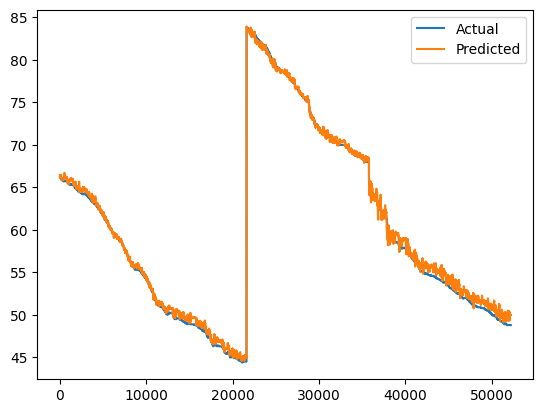

In [80]:
import os
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv1D, SimpleRNN, Dense, Activation, Input
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

# Model definition with CNN + Simple RNN
input_layer = Input(shape=(X_train_norm.shape[1], 1))

# 1D Convolutional layer
conv1 = Conv1D(filters=32, kernel_size=3, padding='same')(input_layer)
conv2 = Conv1D(filters=16, kernel_size=3, padding='same')(conv1)
conv2 = Activation('sigmoid')(conv2)

# Simple RNN layer
rnn_layer = SimpleRNN(32, activation='linear', return_sequences=False)(conv1)

# Dense layers
dense1 = Dense(16, activation='linear')(rnn_layer)
dense2 = Dense(8, activation='linear')(dense1)
dense3 = Dense(4, activation='linear')(dense2)

# Output layer
output_layer = Dense(1, activation='linear')(dense3)

# Combine the model
combined_model = Model(inputs=input_layer, outputs=output_layer)
combined_model.summary()

# Compile the model
opt = Adam(learning_rate=0.0001)
combined_model.compile(optimizer=opt, loss='mae', metrics=['mae'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=25)

# Train the model
history = combined_model.fit(X_train_norm, y_train, epochs=50, verbose=1,
                             batch_size=64,
                             validation_data=(X_val_norm, y_val),
                             callbacks=[early_stopping])

# Evaluate the model on the test set
y_pred_combined = combined_model.predict(X_test_norm)
# Call regression metrics
regression_metrics(y_test, y_pred_combined)

# Plot the comparison between the predicted and actual values
plt.plot(y_test, label='Actual')
plt.plot(y_pred_combined, label='Predicted')
plt.legend()
plt.show()


Model: "functional_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_41 (InputLayer)     │ (None, 17, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_61 (Conv1D)              │ (None, 17, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_55 (Activation)      │ (None, 17, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_19 (SimpleRNN)       │ (None, 64)             │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_141 (Dense)               │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_142 (Dense)               │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_143 (Dense)               │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,521 (29.38 KB)

 Trainable params: 7,521 (29.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
13950/13950 ━━━━━━━━━━━━━━━━━━━━ 38s 3ms/step - loss: 4.1281 - mae: 4.1281 - val_loss: 1.5555 - val_mae: 1.5555
Epoch 2/50
13950/13950 ━━━━━━━━━━━━━━━━━━━━ 37s 3ms/step - loss: 0.9777 - mae: 0.9777 - val_loss: 1.1090 - val_mae: 1.1090
Epoch 3/50
13950/13950 ━━━━━━━━━━━━━━━━━━━━ 36s 3ms/step - loss: 0.9753 - mae: 0.9753 - val_loss: 1.0201 - val_mae: 1.0201
Epoch 4/50
13950/13950 ━━━━━━━━━━━━━━━━━━━━ 36s 3ms/step - loss: 0.9680 - mae: 0.9680 - val_loss: 0.9656 - val_mae: 0.9656
Epoch 5/50
13950/13950 ━━━━━━━━━━━━━━━━━━━━ 36s 3ms/step - loss: 0.9673 - mae: 0.9673 - val_loss: 0.9630 - val_mae: 0.9630
Epoch 6/50
13950/13950 ━━━━━━━━━━━━━━━━━━━━ 36s 3ms/step - loss: 0.9608 - mae: 0.9608 - val_loss: 0.9246 - val_mae: 0.9246
Epoch 7/50
13950/13950 ━━━━━━━━━━━━━━━━━━━━ 36s 3ms/step - loss: 0.9612 - mae: 0.9612 - val_loss: 0.9186 - val_mae: 0.9186
Epoch 8/50
13950/13950 ━━━━━━━━━━━━━━━━━━━━ 37s 3ms/step - loss: 0.9523 - mae: 0.9523 - val_loss: 0.8523 - val_mae: 0.8523
Epoch 9/50
13950

C:\Users\athya\anaconda3\envs\cso211\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


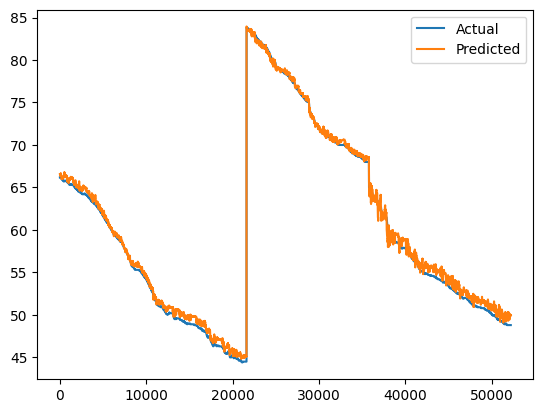

In [76]:
import os
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv1D, SimpleRNN, Dense, Activation, Input
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

# Assuming X_train, X_val, X_test, y_train, y_val, y_test are preloaded datasets

# Create a StandardScaler object
scaler = StandardScaler()

# Normalize the training data
X_train_norm = scaler.fit_transform(X_train)
# Normalize the validation data using the same scaler object
X_val_norm = scaler.transform(X_val)
# Normalize the testing data using the same scaler object
X_test_norm = scaler.transform(X_test)

# Model definition with CNN + Simple RNN
input_layer = Input(shape=(X_train_norm.shape[1], 1))

# 1D Convolutional layer
conv1 = Conv1D(filters=32, kernel_size=3, padding='same')(input_layer)
conv1 = Activation('linear')(conv1)

# Simple RNN layer
rnn_layer = SimpleRNN(64, activation='linear', return_sequences=False)(conv1)

# Dense layers
dense1 = Dense(16, activation='linear')(rnn_layer)
dense2 = Dense(8, activation='linear')(dense1)

# Output layer
output_layer = Dense(1, activation='linear')(dense2)

# Combine the model
combined_model = Model(inputs=input_layer, outputs=output_layer)
combined_model.summary()

# Compile the model
opt = Adam(learning_rate=0.0001)
combined_model.compile(optimizer=opt, loss='mae', metrics=['mae'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=15)

# Train the model
history = combined_model.fit(X_train_norm, y_train, epochs=50, verbose=1,
                             batch_size=64,
                             validation_data=(X_val_norm, y_val),
                             callbacks=[early_stopping])

# Evaluate the model on the test set
y_pred_combined = combined_model.predict(X_test_norm)
# Call regression metrics
regression_metrics(y_test, y_pred_combined)

# Plot the comparison between the predicted and actual values
plt.plot(y_test, label='Actual')
plt.plot(y_pred_combined, label='Predicted')
plt.legend()
plt.show()


Model: "functional_45"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_51 (InputLayer)     │ (None, 17, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_80 (Conv1D)              │ (None, 17, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_26 (SimpleRNN)       │ (None, 48)             │         3,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_173 (Dense)               │ (None, 24)             │         1,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_174 (Dense)               │ (None, 16)             │           400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_175 (Dense)               │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_176 (Dense)               │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,737 (22.41 KB)

 Trainable params: 5,737 (22.41 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
13950/13950 ━━━━━━━━━━━━━━━━━━━━ 49s 3ms/step - loss: 4.4349 - mae: 4.4349 - val_loss: 0.9753 - val_mae: 0.9753
Epoch 2/50
13950/13950 ━━━━━━━━━━━━━━━━━━━━ 48s 3ms/step - loss: 0.9600 - mae: 0.9600 - val_loss: 0.9821 - val_mae: 0.9821
Epoch 3/50
13950/13950 ━━━━━━━━━━━━━━━━━━━━ 51s 4ms/step - loss: 0.9570 - mae: 0.9570 - val_loss: 1.0482 - val_mae: 1.0482
Epoch 4/50
13950/13950 ━━━━━━━━━━━━━━━━━━━━ 50s 4ms/step - loss: 0.9530 - mae: 0.9530 - val_loss: 0.9554 - val_mae: 0.9554
Epoch 5/50
13950/13950 ━━━━━━━━━━━━━━━━━━━━ 51s 4ms/step - loss: 0.9482 - mae: 0.9482 - val_loss: 1.1306 - val_mae: 1.1306
Epoch 6/50
13950/13950 ━━━━━━━━━━━━━━━━━━━━ 49s 3ms/step - loss: 0.9464 - mae: 0.9464 - val_loss: 0.8117 - val_mae: 0.8117
Epoch 7/50
13950/13950 ━━━━━━━━━━━━━━━━━━━━ 50s 4ms/step - loss: 0.9495 - mae: 0.9495 - val_loss: 1.0639 - val_mae: 1.0639
Epoch 8/50
13950/13950 ━━━━━━━━━━━━━━━━━━━━ 47s 3ms/step - loss: 0.9447 - mae: 0.9447 - val_loss: 0.8603 - val_mae: 0.8603
Epoch 9/50
13950

C:\Users\athya\anaconda3\envs\cso211\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Mean Squared Error: 0.4617180173168291
Root Mean Square Error: 0.6794983571112068
Root Mean Square Percentage Error: [0.01228871]
Mean Absolute Error: 0.6147192523946582
Mean Absolute Percentage Error: 0.010805867365559059


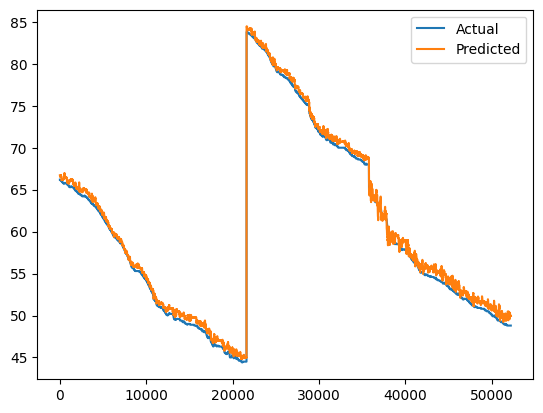

In [86]:
import os
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv1D, SimpleRNN, Dense, Activation, Input
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

# Assuming X_train, X_val, X_test, y_train, y_val, y_test are preloaded datasets

# Create a StandardScaler object
scaler = StandardScaler()

# Normalize the training data
X_train_norm = scaler.fit_transform(X_train)
# Normalize the validation data using the same scaler object
X_val_norm = scaler.transform(X_val)
# Normalize the testing data using the same scaler object
X_test_norm = scaler.transform(X_test)

# Model definition with CNN + Simple RNN
input_layer = Input(shape=(X_train_norm.shape[1], 1))

# 1D Convolutional layer
conv1 = Conv1D(filters=32, kernel_size=3, padding='same')(input_layer)
conv2 = Conv1D(filters=16, kernel_size=3, padding='same')(conv1)
conv2 = Activation('linear')(conv2)

# Simple RNN layer
rnn_layer = SimpleRNN(48, activation='linear', return_sequences=False)(conv1)

# Dense layers
dense1 = Dense(24, activation='linear')(rnn_layer)
dense2 = Dense(16, activation='linear')(dense1)
dense3 = Dense(8, activation='linear')(dense2)

# Output layer
output_layer = Dense(1, activation='linear')(dense3)

# Combine the model
combined_model = Model(inputs=input_layer, outputs=output_layer)
combined_model.summary()

# Compile the model
opt = Adam(learning_rate=0.0001)
combined_model.compile(optimizer=opt, loss='mae', metrics=['mae'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=25)

# Train the model
history = combined_model.fit(X_train_norm, y_train, epochs=50, verbose=1,
                             batch_size=64,
                             validation_data=(X_val_norm, y_val),
                             callbacks=[early_stopping])

# Evaluate the model on the test set
y_pred_combined = combined_model.predict(X_test_norm)
# Call regression metrics
regression_metrics(y_test, y_pred_combined)

# Plot the comparison between the predicted and actual values
plt.plot(y_test, label='Actual')
plt.plot(y_pred_combined, label='Predicted')
plt.legend()
plt.show()


Model: "functional_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_39 (InputLayer)     │ (None, 17, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_59 (Conv1D)              │ (None, 17, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_53 (Activation)      │ (None, 17, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_17 (SimpleRNN)       │ (None, 64)             │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_134 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_135 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_136 (Dense)               │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_137 (Dense)               │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,089 (35.50 KB)

 Trainable params: 9,089 (35.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
13950/13950 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - loss: 4.0468 - mae: 4.0468 - val_loss: 1.0730 - val_mae: 1.0730
Epoch 2/50
13950/13950 ━━━━━━━━━━━━━━━━━━━━ 37s 3ms/step - loss: 0.9854 - mae: 0.9854 - val_loss: 0.9228 - val_mae: 0.9228
Epoch 3/50
13950/13950 ━━━━━━━━━━━━━━━━━━━━ 34s 2ms/step - loss: 0.9763 - mae: 0.9763 - val_loss: 0.9254 - val_mae: 0.9254
Epoch 4/50
13950/13950 ━━━━━━━━━━━━━━━━━━━━ 34s 2ms/step - loss: 0.9734 - mae: 0.9734 - val_loss: 0.8237 - val_mae: 0.8237
Epoch 5/50
13950/13950 ━━━━━━━━━━━━━━━━━━━━ 37s 3ms/step - loss: 0.9688 - mae: 0.9688 - val_loss: 1.0389 - val_mae: 1.0389
Epoch 6/50
13950/13950 ━━━━━━━━━━━━━━━━━━━━ 36s 3ms/step - loss: 0.9671 - mae: 0.9671 - val_loss: 0.9167 - val_mae: 0.9167
Epoch 7/50
13950/13950 ━━━━━━━━━━━━━━━━━━━━ 34s 2ms/step - loss: 0.9601 - mae: 0.9601 - val_loss: 0.9693 - val_mae: 0.9693
Epoch 8/50
13950/13950 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step - loss: 0.9581 - mae: 0.9581 - val_loss: 0.9366 - val_mae: 0.9366
Epoch 9/50
13950

C:\Users\athya\anaconda3\envs\cso211\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


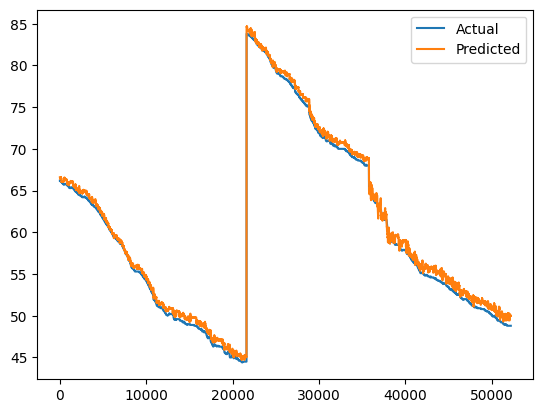

In [74]:
import os
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv1D, SimpleRNN, Dense, Activation, Input
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

# Assuming X_train, X_val, X_test, y_train, y_val, y_test are preloaded datasets

# Create a StandardScaler object
scaler = StandardScaler()

# Normalize the training data
X_train_norm = scaler.fit_transform(X_train)
# Normalize the validation data using the same scaler object
X_val_norm = scaler.transform(X_val)
# Normalize the testing data using the same scaler object
X_test_norm = scaler.transform(X_test)

# Model definition with CNN + Simple RNN
input_layer = Input(shape=(X_train_norm.shape[1], 1))

# 1D Convolutional layer
conv1 = Conv1D(filters=32, kernel_size=3, padding='same')(input_layer)
conv1 = Activation('linear')(conv1)

# Simple RNN layer
rnn_layer = SimpleRNN(64, activation='linear', return_sequences=False)(conv1)

# Dense layers
dense1 = Dense(32, activation='linear')(rnn_layer)
dense2 = Dense(16, activation='linear')(dense1)
dense3 = Dense(8, activation='linear')(dense2)

# Output layer
output_layer = Dense(1, activation='linear')(dense3)

# Combine the model
combined_model = Model(inputs=input_layer, outputs=output_layer)
combined_model.summary()

# Compile the model
opt = Adam(learning_rate=0.0001)
combined_model.compile(optimizer=opt, loss='mae', metrics=['mae'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=15)

# Train the model
history = combined_model.fit(X_train_norm, y_train, epochs=50, verbose=1,
                             batch_size=64,
                             validation_data=(X_val_norm, y_val),
                             callbacks=[early_stopping])

# Evaluate the model on the test set
y_pred_combined = combined_model.predict(X_test_norm)
# Call regression metrics
regression_metrics(y_test, y_pred_combined)

# Plot the comparison between the predicted and actual values
plt.plot(y_test, label='Actual')
plt.plot(y_pred_combined, label='Predicted')
plt.legend()
plt.show()


Model: "functional_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_31 (InputLayer)     │ (None, 17, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_52 (Conv1D)              │ (None, 17, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_46 (Activation)      │ (None, 17, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_11 (SimpleRNN)       │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_102 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_103 (Dense)               │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_104 (Dense)               │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
13950/13950 ━━━━━━━━━━━━━━━━━━━━ 33s 2ms/step - loss: 11.1284 - mae: 11.1284 - val_loss: 5.0746 - val_mae: 5.0746
Epoch 2/50
13950/13950 ━━━━━━━━━━━━━━━━━━━━ 31s 2ms/step - loss: 1.8270 - mae: 1.8270 - val_loss: 3.6446 - val_mae: 3.6446
Epoch 3/50
13950/13950 ━━━━━━━━━━━━━━━━━━━━ 31s 2ms/step - loss: 1.4839 - mae: 1.4839 - val_loss: 3.1430 - val_mae: 3.1430
Epoch 4/50
13950/13950 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - loss: 1.3174 - mae: 1.3174 - val_loss: 2.8169 - val_mae: 2.8169
Epoch 5/50
13950/13950 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - loss: 1.2182 - mae: 1.2182 - val_loss: 3.0376 - val_mae: 3.0376
Epoch 6/50
13950/13950 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - loss: 1.1335 - mae: 1.1335 - val_loss: 2.3602 - val_mae: 2.3602
Epoch 7/50
13950/13950 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - loss: 1.0607 - mae: 1.0607 - val_loss: 2.4729 - val_mae: 2.4729
Epoch 8/50
13950/13950 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - loss: 0.9963 - mae: 0.9963 - val_loss: 2.4084 - val_mae: 2.4084
Epoch 9/50
139

C:\Users\athya\anaconda3\envs\cso211\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


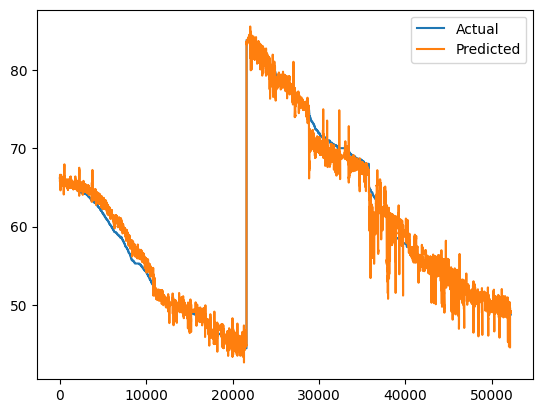

In [61]:
import os
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv1D, SimpleRNN, Dense, Activation, Input
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

# Assuming X_train, X_val, X_test, y_train, y_val, y_test are preloaded datasets

# Create a StandardScaler object
scaler = StandardScaler()

# Normalize the training data
X_train_norm = scaler.fit_transform(X_train)
# Normalize the validation data using the same scaler object
X_val_norm = scaler.transform(X_val)
# Normalize the testing data using the same scaler object
X_test_norm = scaler.transform(X_test)

# Model definition with CNN + Simple RNN
input_layer = Input(shape=(X_train_norm.shape[1], 1))

# 1D Convolutional layer
conv1 = Conv1D(filters=32, kernel_size=3, padding='same')(input_layer)
conv1 = Activation('relu')(conv1)

# Simple RNN layer
rnn_layer = SimpleRNN(32, activation='relu', return_sequences=False)(conv1)

# Dense layers
dense1 = Dense(16, activation='relu')(rnn_layer)
dense2 = Dense(8, activation='relu')(dense1)

# Output layer
output_layer = Dense(1, activation='linear')(dense2)

# Combine the model
combined_model = Model(inputs=input_layer, outputs=output_layer)
combined_model.summary()

# Compile the model
opt = Adam(learning_rate=0.0001)
combined_model.compile(optimizer=opt, loss='mae', metrics=['mae'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=15)

# Train the model
history = combined_model.fit(X_train_norm, y_train, epochs=50, verbose=1,
                             batch_size=64,
                             validation_data=(X_val_norm, y_val),
                             callbacks=[early_stopping])

# Evaluate the model on the test set
y_pred_combined = combined_model.predict(X_test_norm)
# Call regression metrics
regression_metrics(y_test, y_pred_combined)

# Plot the comparison between the predicted and actual values
plt.plot(y_test, label='Actual')
plt.plot(y_pred_combined, label='Predicted')
plt.legend()
plt.show()


In [22]:
from sklearn.model_selection import train_test_split
print(df_x_y)
X = df_x_y.drop(['Time [s]','SoC [%]'], axis=1)
y = df_x_y[['SoC [%]']]  # Close the square bracket
# Split the data into train and test sets with a ratio of 85:15
splitter = int(len(X) * 0.85)
X_train, X_test = X.values[:splitter], X.values[splitter:]
y_train, y_test = y.values[:splitter], y.values[splitter:]

# Split the train set into train and validation sets with a ratio of 90:10
splitter1 = int(len(X_train) * 0.9)
X_train, X_val = X_train[:splitter1], X_train[splitter1:]
y_train, y_val = y_train[:splitter1], y_train[splitter1:]

# Check the dataset sizes
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape)
df = df_x_y

         Time [s]  Elevation [m]  Motor Torque [Nm]  \
0             0.0          574.0                0.0   
1             0.1          574.0                0.0   
2             0.2          574.0                0.0   
3             0.3          574.0                0.0   
4             0.4          574.0                0.0   
...           ...            ...                ...   
1044165    1642.4          476.0                2.5   
1044166    1642.5          476.0                2.5   
1044167    1642.6          476.0                2.5   
1044168    1642.7          476.0                2.5   
1044169    1642.8          476.0                2.5   

         Longitudinal Acceleration [m/s^2]  Regenerative Braking Signal   \
0                                    -0.03                           0.0   
1                                     0.00                           0.0   
2                                    -0.01                           0.0   
3                                  

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 17, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_19 (Conv1D)              │ (None, 17, 16)         │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_9 (SimpleRNN)        │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,009 (3.94 KB)

 Trainable params: 1,009 (3.94 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
24963/24963 ━━━━━━━━━━━━━━━━━━━━ 49s 2ms/step - loss: 4.3962 - mae: 4.3962 - val_loss: 1.3822 - val_mae: 1.3822
Epoch 2/50
24963/24963 ━━━━━━━━━━━━━━━━━━━━ 54s 2ms/step - loss: 0.9050 - mae: 0.9050 - val_loss: 1.1944 - val_mae: 1.1944
Epoch 3/50
24963/24963 ━━━━━━━━━━━━━━━━━━━━ 51s 2ms/step - loss: 0.9028 - mae: 0.9028 - val_loss: 1.5976 - val_mae: 1.5976
Epoch 4/50
24963/24963 ━━━━━━━━━━━━━━━━━━━━ 49s 2ms/step - loss: 0.9004 - mae: 0.9004 - val_loss: 1.3230 - val_mae: 1.3230
Epoch 5/50
24963/24963 ━━━━━━━━━━━━━━━━━━━━ 47s 2ms/step - loss: 0.9008 - mae: 0.9008 - val_loss: 1.8099 - val_mae: 1.8099
Epoch 6/50
24963/24963 ━━━━━━━━━━━━━━━━━━━━ 51s 2ms/step - loss: 0.8981 - mae: 0.8981 - val_loss: 1.6377 - val_mae: 1.6377
Epoch 7/50
24963/24963 ━━━━━━━━━━━━━━━━━━━━ 50s 2ms/step - loss: 0.8934 - mae: 0.8934 - val_loss: 1.3705 - val_mae: 1.3705
Epoch 8/50
24963/24963 ━━━━━━━━━━━━━━━━━━━━ 51s 2ms/step - loss: 0.8947 - mae: 0.8947 - val_loss: 1.2342 - val_mae: 1.2342
Epoch 9/50
24963

C:\Users\athya\anaconda3\envs\cso211\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Mean Squared Error: 1.0532261501383189
Root Mean Square Error: 1.026268069335843
Root Mean Square Percentage Error: [0.02318264]
Mean Absolute Error: 0.7282669804074393
Mean Absolute Percentage Error: 0.01572045051708263


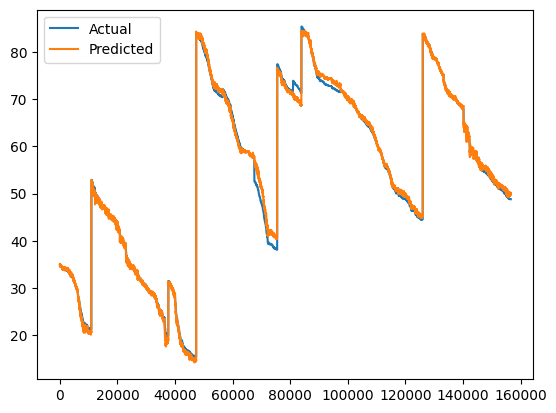

In [28]:
import os
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv1D, SimpleRNN, Dense, Activation, Input
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

# Assuming X_train, X_val, X_test, y_train, y_val, y_test are preloaded datasets

# Create a StandardScaler object
scaler = StandardScaler()

# Normalize the training data
X_train_norm = scaler.fit_transform(X_train)
# Normalize the validation data using the same scaler object
X_val_norm = scaler.transform(X_val)
# Normalize the testing data using the same scaler object
X_test_norm = scaler.transform(X_test)

# Model definition with CNN + Simple RNN
input_layer = Input(shape=(X_train_norm.shape[1], 1))

# 1D Convolutional layer
conv1 = Conv1D(filters=16, kernel_size=3, padding='same')(input_layer)
conv2 = Conv1D(filters=8, kernel_size=3, padding='same')(conv1)
conv2 = Activation('linear')(conv2)

# Simple RNN layer
rnn_layer = SimpleRNN(16, activation='linear', return_sequences=False)(conv1)

# Dense layers
dense1 = Dense(16, activation='linear')(rnn_layer)
dense2 = Dense(8, activation='linear')(dense1)

# Output layer
output_layer = Dense(1, activation='linear')(dense2)

# Combine the model
combined_model = Model(inputs=input_layer, outputs=output_layer)
combined_model.summary()

# Compile the model
opt = Adam(learning_rate=0.0001)
combined_model.compile(optimizer=opt, loss='mae', metrics=['mae'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=25)

# Train the model
history = combined_model.fit(X_train_norm, y_train, epochs=50, verbose=1,
                             batch_size=32,
                             validation_data=(X_val_norm, y_val),
                             callbacks=[early_stopping])

# Evaluate the model on the test set
y_pred_combined = combined_model.predict(X_test_norm)
# Call regression metrics
regression_metrics(y_test, y_pred_combined)

# Plot the comparison between the predicted and actual values
plt.plot(y_test, label='Actual')
plt.plot(y_pred_combined, label='Predicted')
plt.legend()
plt.show()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 17, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 17, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,913 (11.38 KB)

 Trainable params: 2,913 (11.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
12482/12482 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - loss: 5.3937 - mae: 5.3937 - val_loss: 1.3750 - val_mae: 1.3750
Epoch 2/50
12482/12482 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - loss: 0.9085 - mae: 0.9085 - val_loss: 1.9037 - val_mae: 1.9037
Epoch 3/50
12482/12482 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - loss: 0.9096 - mae: 0.9096 - val_loss: 1.5145 - val_mae: 1.5145
Epoch 4/50
12482/12482 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - loss: 0.9067 - mae: 0.9067 - val_loss: 1.2907 - val_mae: 1.2907
Epoch 5/50
12482/12482 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - loss: 0.9041 - mae: 0.9041 - val_loss: 1.1082 - val_mae: 1.1082
Epoch 6/50
12482/12482 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - loss: 0.9014 - mae: 0.9014 - val_loss: 1.8949 - val_mae: 1.8949
Epoch 7/50
12482/12482 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - loss: 0.8993 - mae: 0.8993 - val_loss: 1.2021 - val_mae: 1.2021
Epoch 8/50
12482/12482 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - loss: 0.8971 - mae: 0.8971 - val_loss: 1.1298 - val_mae: 1.1298
Epoch 9/50
12482

C:\Users\athya\anaconda3\envs\cso211\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Mean Squared Error: 1.6535704880540394
Root Mean Square Error: 1.2859123174050553
Root Mean Square Percentage Error: [0.02603642]
Mean Absolute Error: 0.9798507810723711
Mean Absolute Percentage Error: 0.01936979463966027


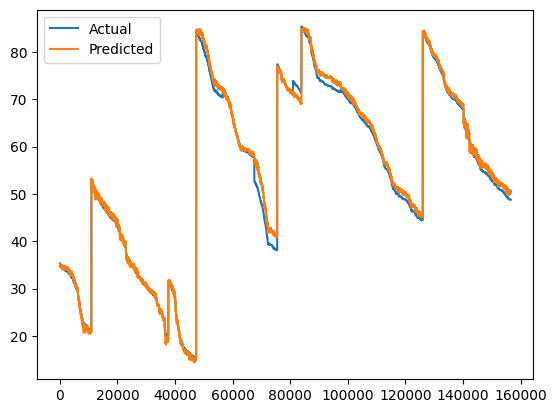

In [19]:
import os
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv1D, SimpleRNN, Dense, Activation, Input
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

# Assuming X_train, X_val, X_test, y_train, y_val, y_test are preloaded datasets

# Create a StandardScaler object
scaler = StandardScaler()

# Normalize the training data
X_train_norm = scaler.fit_transform(X_train)
# Normalize the validation data using the same scaler object
X_val_norm = scaler.transform(X_val)
# Normalize the testing data using the same scaler object
X_test_norm = scaler.transform(X_test)

# Model definition with CNN + Simple RNN
input_layer = Input(shape=(X_train_norm.shape[1], 1))

# 1D Convolutional layer
conv1 = Conv1D(filters=32, kernel_size=3, padding='same')(input_layer)
conv2 = Conv1D(filters=16, kernel_size=3, padding='same')(conv1)
conv2 = Activation('sigmoid')(conv2)

# Simple RNN layer
rnn_layer = SimpleRNN(32, activation='linear', return_sequences=False)(conv1)

# Dense layers
dense1 = Dense(16, activation='linear')(rnn_layer)
dense2 = Dense(8, activation='linear')(dense1)
dense3 = Dense(4, activation='linear')(dense2)

# Output layer
output_layer = Dense(1, activation='linear')(dense3)

# Combine the model
combined_model = Model(inputs=input_layer, outputs=output_layer)
combined_model.summary()

# Compile the model
opt = Adam(learning_rate=0.0001)
combined_model.compile(optimizer=opt, loss='mae', metrics=['mae'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=25)

# Train the model
history = combined_model.fit(X_train_norm, y_train, epochs=50, verbose=1,
                             batch_size=64,
                             validation_data=(X_val_norm, y_val),
                             callbacks=[early_stopping])

# Evaluate the model on the test set
y_pred_combined = combined_model.predict(X_test_norm)
# Call regression metrics
regression_metrics(y_test, y_pred_combined)

# Plot the comparison between the predicted and actual values
plt.plot(y_test, label='Actual')
plt.plot(y_pred_combined, label='Predicted')
plt.legend()
plt.show()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 17, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_8 (Conv1D)               │ (None, 17, 48)         │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_4 (SimpleRNN)        │ (None, 32)             │         2,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,489 (13.63 KB)

 Trainable params: 3,489 (13.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
12482/12482 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - loss: 3.0756 - mae: 3.0756 - val_loss: 2.5270 - val_mae: 2.5270
Epoch 2/50
12482/12482 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - loss: 1.0357 - mae: 1.0357 - val_loss: 1.5672 - val_mae: 1.5672
Epoch 3/50
12482/12482 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - loss: 1.0136 - mae: 1.0136 - val_loss: 2.5847 - val_mae: 2.5847
Epoch 4/50
12482/12482 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - loss: 1.0067 - mae: 1.0067 - val_loss: 2.7176 - val_mae: 2.7176
Epoch 5/50
12482/12482 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - loss: 0.9977 - mae: 0.9977 - val_loss: 1.6072 - val_mae: 1.6072
Epoch 6/50
12482/12482 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - loss: 0.9800 - mae: 0.9800 - val_loss: 1.1162 - val_mae: 1.1162
Epoch 7/50
12482/12482 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - loss: 0.9729 - mae: 0.9729 - val_loss: 1.6109 - val_mae: 1.6109
Epoch 8/50
12482/12482 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - loss: 0.9659 - mae: 0.9659 - val_loss: 1.9861 - val_mae: 1.9861
Epoch 9/50
12482

C:\Users\athya\anaconda3\envs\cso211\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Mean Squared Error: 2.0143777808489576
Root Mean Square Error: 1.4192877723876005
Root Mean Square Percentage Error: [0.02840198]
Mean Absolute Error: 1.1159082947913772
Mean Absolute Percentage Error: 0.021772330791658894


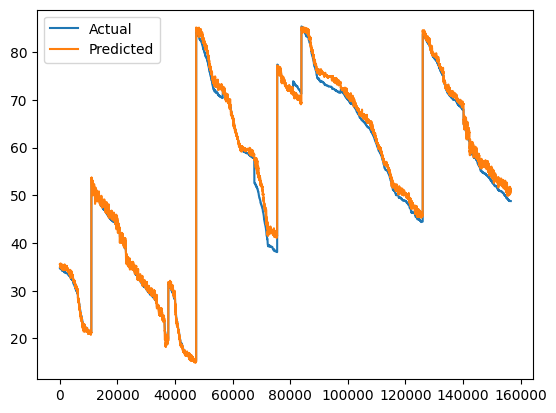

In [23]:
import os
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv1D, SimpleRNN, Dense, Activation, Input
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

# Assuming X_train, X_val, X_test, y_train, y_val, y_test are preloaded datasets

# Create a StandardScaler object
scaler = StandardScaler()

# Normalize the training data
X_train_norm = scaler.fit_transform(X_train)
# Normalize the validation data using the same scaler object
X_val_norm = scaler.transform(X_val)
# Normalize the testing data using the same scaler object
X_test_norm = scaler.transform(X_test)

# Model definition with CNN + Simple RNN
input_layer = Input(shape=(X_train_norm.shape[1], 1))

# 1D Convolutional layer
conv1 = Conv1D(filters=48, kernel_size=3, padding='same')(input_layer)
conv2 = Conv1D(filters=24, kernel_size=3, padding='same')(conv1)
conv3 = Conv1D(filters=8, kernel_size=3, padding='same')(conv2)
conv3 = Activation('sigmoid')(conv2)

# Simple RNN layer
rnn_layer = SimpleRNN(32, activation='linear', return_sequences=False)(conv1)

# Dense layers
dense1 = Dense(16, activation='linear')(rnn_layer)
dense2 = Dense(8, activation='linear')(dense1)
dense3 = Dense(4, activation='linear')(dense2)

# Output layer
output_layer = Dense(1, activation='linear')(dense3)

# Combine the model
combined_model = Model(inputs=input_layer, outputs=output_layer)
combined_model.summary()

# Compile the model
opt = Adam(learning_rate=0.0005)
combined_model.compile(optimizer=opt, loss='mae', metrics=['mae'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=25)

# Train the model
history = combined_model.fit(X_train_norm, y_train, epochs=50, verbose=1,
                             batch_size=64,
                             validation_data=(X_val_norm, y_val),
                             callbacks=[early_stopping])

# Evaluate the model on the test set
y_pred_combined = combined_model.predict(X_test_norm)
# Call regression metrics
regression_metrics(y_test, y_pred_combined)

# Plot the comparison between the predicted and actual values
plt.plot(y_test, label='Actual')
plt.plot(y_pred_combined, label='Predicted')
plt.legend()
plt.show()


Model: "functional_44"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_50 (InputLayer)     │ (None, 17, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_78 (Conv1D)              │ (None, 17, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_25 (SimpleRNN)       │ (None, 48)             │         3,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_169 (Dense)               │ (None, 24)             │         1,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_170 (Dense)               │ (None, 16)             │           400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_171 (Dense)               │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_172 (Dense)               │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,737 (22.41 KB)

 Trainable params: 5,737 (22.41 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
13950/13950 ━━━━━━━━━━━━━━━━━━━━ 47s 3ms/step - loss: 7.1089 - mae: 7.1089 - val_loss: 2.4603 - val_mae: 2.4603
Epoch 2/50
13950/13950 ━━━━━━━━━━━━━━━━━━━━ 46s 3ms/step - loss: 0.7987 - mae: 0.7987 - val_loss: 1.7403 - val_mae: 1.7403
Epoch 3/50
13950/13950 ━━━━━━━━━━━━━━━━━━━━ 46s 3ms/step - loss: 0.6736 - mae: 0.6736 - val_loss: 1.7829 - val_mae: 1.7829
Epoch 4/50
13950/13950 ━━━━━━━━━━━━━━━━━━━━ 46s 3ms/step - loss: 0.6158 - mae: 0.6158 - val_loss: 1.4168 - val_mae: 1.4168
Epoch 5/50
13950/13950 ━━━━━━━━━━━━━━━━━━━━ 47s 3ms/step - loss: 0.5668 - mae: 0.5668 - val_loss: 1.4605 - val_mae: 1.4605
Epoch 6/50
13950/13950 ━━━━━━━━━━━━━━━━━━━━ 48s 3ms/step - loss: 0.5376 - mae: 0.5376 - val_loss: 1.3197 - val_mae: 1.3197
Epoch 7/50
13950/13950 ━━━━━━━━━━━━━━━━━━━━ 47s 3ms/step - loss: 0.5113 - mae: 0.5113 - val_loss: 1.4395 - val_mae: 1.4395
Epoch 8/50
13950/13950 ━━━━━━━━━━━━━━━━━━━━ 46s 3ms/step - loss: 0.4868 - mae: 0.4868 - val_loss: 1.3515 - val_mae: 1.3515
Epoch 9/50
13950

C:\Users\athya\anaconda3\envs\cso211\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Mean Squared Error: 1.4906456227713145
Root Mean Square Error: 1.2209199903234096
Root Mean Square Percentage Error: [0.01976865]
Mean Absolute Error: 0.9518952378264223
Mean Absolute Percentage Error: 0.015881794755624092


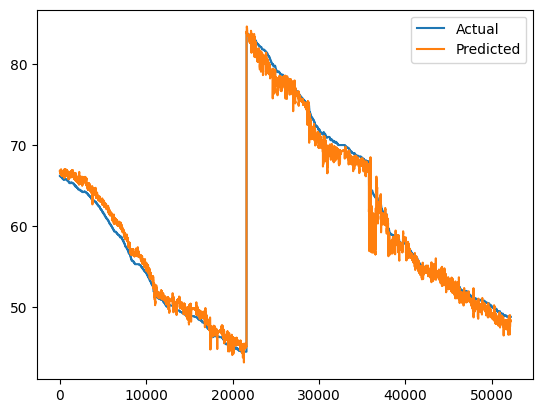

In [85]:
import os
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv1D, SimpleRNN, Dense, Activation, Input
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

# Assuming X_train, X_val, X_test, y_train, y_val, y_test are preloaded datasets

# Create a StandardScaler object
scaler = StandardScaler()

# Normalize the training data
X_train_norm = scaler.fit_transform(X_train)
# Normalize the validation data using the same scaler object
X_val_norm = scaler.transform(X_val)
# Normalize the testing data using the same scaler object
X_test_norm = scaler.transform(X_test)

# Model definition with CNN + Simple RNN
input_layer = Input(shape=(X_train_norm.shape[1], 1))

# 1D Convolutional layer
conv1 = Conv1D(filters=32, kernel_size=3, padding='same')(input_layer)
conv2 = Conv1D(filters=16, kernel_size=3, padding='same')(conv1)
conv2 = Activation('relu')(conv2)

# Simple RNN layer
rnn_layer = SimpleRNN(48, activation='relu', return_sequences=False)(conv1)

# Dense layers
dense1 = Dense(24, activation='relu')(rnn_layer)
dense2 = Dense(16, activation='relu')(dense1)
dense3 = Dense(8, activation='relu')(dense2)

# Output layer
output_layer = Dense(1, activation='linear')(dense3)

# Combine the model
combined_model = Model(inputs=input_layer, outputs=output_layer)
combined_model.summary()

# Compile the model
opt = Adam(learning_rate=0.0001)
combined_model.compile(optimizer=opt, loss='mae', metrics=['mae'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=25)

# Train the model
history = combined_model.fit(X_train_norm, y_train, epochs=50, verbose=1,
                             batch_size=64,
                             validation_data=(X_val_norm, y_val),
                             callbacks=[early_stopping])

# Evaluate the model on the test set
y_pred_combined = combined_model.predict(X_test_norm)
# Call regression metrics
regression_metrics(y_test, y_pred_combined)

# Plot the comparison between the predicted and actual values
plt.plot(y_test, label='Actual')
plt.plot(y_pred_combined, label='Predicted')
plt.legend()
plt.show()


Model: "functional_52"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_62      │ (None, 17, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_92 (Conv1D)  │ (None, 17, 32)    │        128 │ input_layer_62[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_80       │ (None, 17, 32)    │          0 │ conv1d_92[0][0]   │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 17, 32)    │      2,128 │ activation_80[0]… │
│ (MultiHeadAttentio… │                   │            │ activation_80[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_40 (Add)        │ (None, 17, 32)    │          0 │ activation_80[0]… │
│                     │                   │            │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 17, 32)    │         64 │ add_40[0][0]      │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ simple_rnn_36       │ (None, 32)        │      2,080 │ layer_normalizat… │
│ (SimpleRNN)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_201 (Dense)   │ (None, 16)        │        528 │ simple_rnn_36[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_202 (Dense)   │ (None, 8)         │        136 │ dense_201[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_203 (Dense)   │ (None, 1)         │          9 │ dense_202[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 5,073 (19.82 KB)

 Trainable params: 5,073 (19.82 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
13950/13950 ━━━━━━━━━━━━━━━━━━━━ 204s 14ms/step - loss: 4.1467 - mae: 4.1467 - val_loss: 0.9812 - val_mae: 0.9812
Epoch 2/50
13950/13950 ━━━━━━━━━━━━━━━━━━━━ 198s 14ms/step - loss: 0.8077 - mae: 0.8077 - val_loss: 1.2377 - val_mae: 1.2377
Epoch 3/50
13950/13950 ━━━━━━━━━━━━━━━━━━━━ 200s 14ms/step - loss: 0.7458 - mae: 0.7458 - val_loss: 1.1397 - val_mae: 1.1397
Epoch 4/50
13950/13950 ━━━━━━━━━━━━━━━━━━━━ 199s 14ms/step - loss: 0.7253 - mae: 0.7253 - val_loss: 1.1537 - val_mae: 1.1537
Epoch 5/50
13950/13950 ━━━━━━━━━━━━━━━━━━━━ 199s 14ms/step - loss: 0.7063 - mae: 0.7063 - val_loss: 1.0736 - val_mae: 1.0736
Epoch 6/50
13950/13950 ━━━━━━━━━━━━━━━━━━━━ 198s 14ms/step - loss: 0.6920 - mae: 0.6920 - val_loss: 1.2359 - val_mae: 1.2359
Epoch 7/50
13950/13950 ━━━━━━━━━━━━━━━━━━━━ 200s 14ms/step - loss: 0.6820 - mae: 0.6820 - val_loss: 1.1835 - val_mae: 1.1835
Epoch 8/50
13950/13950 ━━━━━━━━━━━━━━━━━━━━ 200s 14ms/step - loss: 0.6678 - mae: 0.6678 - val_loss: 1.1532 - val_mae: 1.1532


C:\Users\athya\anaconda3\envs\cso211\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Mean Squared Error: 1.6924906516957894
Root Mean Square Error: 1.3009575902756358
Root Mean Square Percentage Error: [0.02001207]
Mean Absolute Error: 1.0809349586366843
Mean Absolute Percentage Error: 0.01726080995618983


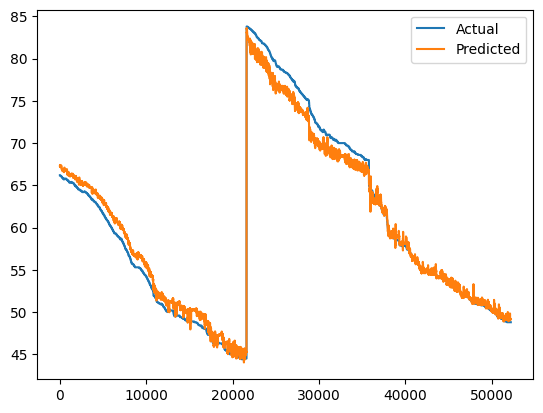

In [97]:
import os
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv1D, SimpleRNN, Dense, Activation, Input, MultiHeadAttention, LayerNormalization, Add
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

# Assuming X_train, X_val, X_test, y_train, y_val, y_test are preloaded datasets

# Create a StandardScaler object
scaler = StandardScaler()

# Normalize the training data
X_train_norm = scaler.fit_transform(X_train)
# Normalize the validation data using the same scaler object
X_val_norm = scaler.transform(X_val)
# Normalize the testing data using the same scaler object
X_test_norm = scaler.transform(X_test)

# Model definition with CNN + Attention + Simple RNN
input_layer = Input(shape=(X_train_norm.shape[1], 1))

# 1D Convolutional layer
conv1 = Conv1D(filters=32, kernel_size=3, padding='same')(input_layer)
conv1 = Activation('sigmoid')(conv1)

# Attention layer between CNN and RNN
attention_layer = MultiHeadAttention(num_heads=2, key_dim=8)(conv1, conv1)
attention_layer = Add()([conv1, attention_layer])  # Skip connection
attention_layer = LayerNormalization()(attention_layer)  # Normalization

# Simple RNN layer
rnn_layer = SimpleRNN(32, activation='linear', return_sequences=False)(attention_layer)

# Dense layers
dense1 = Dense(16, activation='linear')(rnn_layer)
dense2 = Dense(8, activation='linear')(dense1)

# Output layer
output_layer = Dense(1, activation='linear')(dense2)

# Combine the model
combined_model = Model(inputs=input_layer, outputs=output_layer)
combined_model.summary()

# Compile the model
opt = Adam(learning_rate=0.0001)
combined_model.compile(optimizer=opt, loss='mae', metrics=['mae'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=25)

# Train the model
history = combined_model.fit(X_train_norm, y_train, epochs=50, verbose=1,
                             batch_size=64,
                             validation_data=(X_val_norm, y_val),
                             callbacks=[early_stopping])

# Evaluate the model on the test set
y_pred_combined = combined_model.predict(X_test_norm)
# Call regression metrics (assuming you have defined the regression_metrics function)
regression_metrics(y_test, y_pred_combined)

# Plot the comparison between the predicted and actual values
plt.plot(y_test, label='Actual')
plt.plot(y_pred_combined, label='Predicted')
plt.legend()
plt.show()


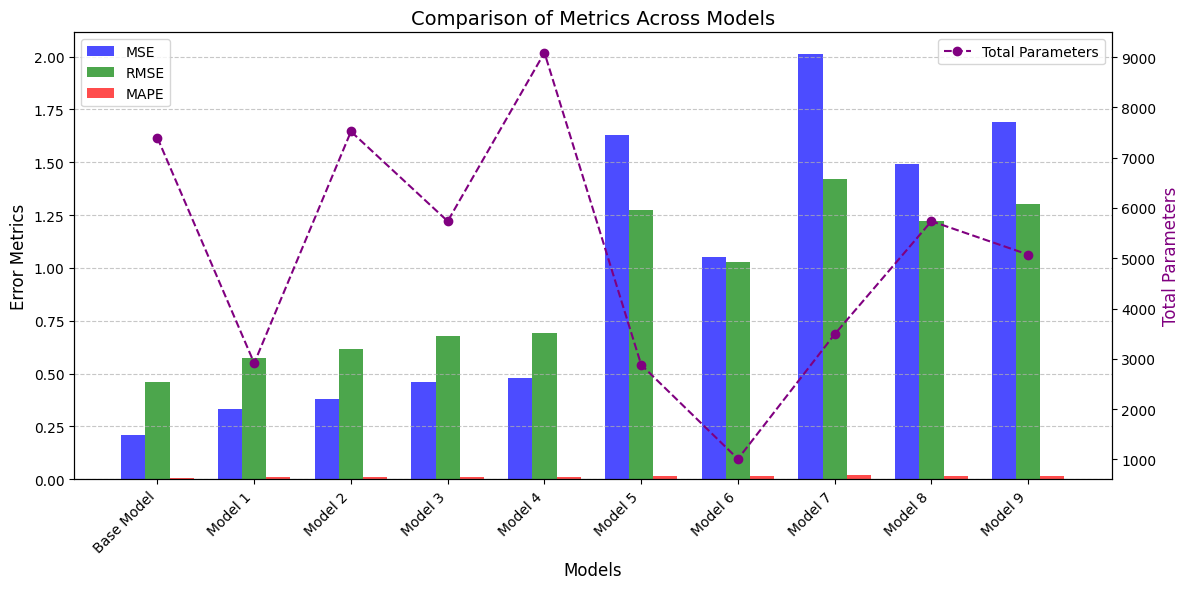

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the models
models = [
    "Base Model",
    "Model 1",
    "Model 2",
    "Model 3",
    "Model 4",
    "Model 5",
    "Model 6",
    "Model 7",
    "Model 8",
    "Model 9",
]
parameters = [7393, 2913, 7521, 5737, 9089, 2881, 1009, 3489, 5737, 5073]
mse = [0.2114, 0.3305, 0.3821, 0.4617, 0.4788, 1.6290, 1.0532, 2.0144, 1.4906, 1.6925]
rmse = [0.4598, 0.5749, 0.6181, 0.6795, 0.6920, 1.2763, 1.0263, 1.4193, 1.2209, 1.3010]
mape = [0.0049, 0.0084, 0.0095, 0.0108, 0.0111, 0.0152, 0.0157, 0.0218, 0.0159, 0.0173]

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot MSE, RMSE, MAPE on the same plot
x = np.arange(len(models))
width = 0.25

# Bar plots for each metric
ax1.bar(x - width, mse, width, label='MSE', color='blue', alpha=0.7)
ax1.bar(x, rmse, width, label='RMSE', color='green', alpha=0.7)
ax1.bar(x + width, mape, width, label='MAPE', color='red', alpha=0.7)

# Secondary y-axis for total parameters
ax2 = ax1.twinx()
ax2.plot(x, parameters, label='Total Parameters', color='purple', marker='o', linestyle='--')

# Adding labels and titles
ax1.set_xlabel('Models', fontsize=12)
ax1.set_ylabel('Error Metrics', fontsize=12)
ax2.set_ylabel('Total Parameters', fontsize=12, color='purple')
ax1.set_title('Comparison of Metrics Across Models', fontsize=14)
ax1.set_xticks(x)
ax1.set_xticklabels(models, rotation=45, ha='right')
ax1.legend(loc='upper left', fontsize=10)
ax2.legend(loc='upper right', fontsize=10)

# Show grid and plot
ax1.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
